<font color ='gray'> [Start here](https://hub.binder.tdm-pilot.org/user/jasf--tdm-nbs-6ywmisk4/notebooks/About%20the%20Corpus%20and%20About%20Jupyter.ipynb) with 'About the Corpus/About Jupyter' </font>

# Quantifying characteristics of documents in your dataset

This notebook demonstrates how to quantify and ultimately visualize some characteristics of your dataset.  It includes steps to:

* Import software that will let us visualize our data
* Examine metadata from our documents
* Look at quantitative characteristics of our datasets to answer and visualize our ultimate question:  

* **Are the documents containing my keywords getting longer over time?**

A quick note before we get started. As you work through this notebook you'll see cells marked ***'optional'***. These are opportunities for you to try modifying and applying Python code to see what happens. I encourage you to try them, but you can also just run the notebook as written.

Let's do this! First we'll bring in pandas, which is a software library that will help us visualize our data.

In [40]:
import pandas as pd

Next we import the Dataset module from the tdm_client library. The tdm_client library contains functions for connecting to the JSTOR server containing our corpus dataset.

In [41]:
from tdm_client import Dataset

To analyze your dataset, use the [dataset ID](./key-terms.ipynb/#dataset-ID) provided when you created your [dataset](./key-terms.ipynb/#dataset). It should look like a long series of characters surrounded by dashes.  

We create a new variable **dset** and initialize its value using the **Dataset** function. A sample **dataset ID** of data derived from searching JSTOR for 'antibiotic' and 'resistance' and 'coli' is provided here ('06390cab-0bd5-5e5a-de2a-695d0b47f904'). Deleting that dataset ID and pasting your unique **dataset ID** instead will import your dataset from the JSTOR server.

In [42]:
dset = Dataset('06390cab-0bd5-5e5a-de2a-695d0b47f904')

Before we go further, let's double-check to make sure we have the correct dataset. We can look at the original query by using the query_text method.

In [43]:
dset.query_text()

'"antibiotic resistance coli" from JSTOR and language(s) English from 1900 - 2020'

Let's take a look at what's in there!  We can find the total number of documents in the dataset using the `len()` function. 

In [44]:
len(dset)

10664

The next command pulls the metadata elements out of our dataset. (No output will show.)

In [45]:
metadata = dset.get_metadata()

Let's look at a sample. The following command prints metadata for the first document in the set.


In [46]:
print(metadata[14])

{'id': 'http://www.jstor.org/stable/44614859', 'docType': 'article', 'abstract': 'It is hypothesized that the weightless environment experienced during space flight has a stimulating effect on the growth rate of microorganisms. This theory was tested with the bacterium Escherichia coli using protocols and supporting hardware evolved over five space shuttle missions between April, 1991 and July, 1993. In comparing 38 bacterial growth experiments across multiple flights, the overall average population density of E. coli achieved in space was 88% greater than that of matched ground controls (N=19 flight, 19 ground, p < 0.05). Depending on test variables, growth increases in space of up to 257% over ground controls were observed. Analysis of bacterial proteins by gel electrophoresis indicated an apparent difference in expressed protein between flight and ground control E. coli samples in the range of 20-30 kD.', 'title': 'Investigation of Space Flight Effects on Escherichia coli Growth', '

Copy the 'ID' (URL) in the first line above and paste it into a separate browser tab or window.  
It should look like a journal article, unsurprisingly.

*Optional: How would you print metadata for the **6th** document in this set?  Try it in the code block below.*

We grabbed the metadata successfully, but that big block of text isn't too pretty.  

We can convert that metadata to a pandas DataFrame to take advantage of its plotting and manipulation functions. This will present our metadata in a table-like format, and help us learn more about what's in our dataset. 

First we define this new dataframe as 'df'.

In [47]:
df = pd.DataFrame(metadata)

Now we'll organize the first 4 rows (aka documents) of the DataFrame we named 'df' into a table with a header, and take a look at their metadata.


In [48]:
df.head(4)

,id,docType,abstract,title,creators,isPartOf,sourceCategory,pageStart,url,volumeNumber,...,publisher,wordCount,tdmCategory,provider,outputFormat,identifier,subTitle,iid,bigramCount,trigramCount
0,http://www.jstor.org/stable/30142230,article,This review analyses the phenomenon of bacteri...,Bacterial Mycophagy: Definition and Diagnosis ...,"[Johan H. J. Leveau, Gail M. Preston]",The New Phytologist,"[Science & Mathematics, Botany & Plant Science...",859,http://www.jstor.org/stable/30142230,4,...,Wiley,15360,"[Science (General), Physiology]",jstor,[unigram],"[{'name': 'issn', 'value': '0028646X'}, {'name...",NaN,NaN,NaN,NaN
1,http://www.jstor.org/stable/30224786,article,"In Arabidopsis thaliana, the ability to flower...",Characterization of a MADS FLOWERING LOCUS C-L...,"[A. Locascio, M. Lucchin, S. Varotto]",The New Phytologist,"[Science & Mathematics, Botany & Plant Science...",630,http://www.jstor.org/stable/30224786,3,...,Wiley,10010,"[Science (General), Physiology]",jstor,[unigram],"[{'name': 'issn', 'value': '0028646X'}, {'name...",NaN,NaN,NaN,NaN
2,http://www.jstor.org/stable/4091495,article,• We report on the second phase of a programme...,Assessment of Plants from the Brassicaceae Fam...,"[Wendy Ann Peer, Mehrzad Mahmoudian, John L. F...",The New Phytologist,"[Science & Mathematics, Botany & Plant Science...",248,http://www.jstor.org/stable/4091495,2,...,Wiley,9291,"[Science (General), Botany, Physics]",jstor,[unigram],"[{'name': 'issn', 'value': '0028646X'}, {'name...",NaN,NaN,NaN,NaN
3,http://www.jstor.org/stable/1514055,article,Various rhizosphere bacteria are potential (mi...,Phenazines and Their Role in Biocontrol by Pse...,"[Thomas F. C. Chin-A-Woeng, Guido V. Bloemberg...",The New Phytologist,"[Science & Mathematics, Botany & Plant Science...",503,http://www.jstor.org/stable/1514055,3,...,Wiley,18176,"[Science (General), Physiology, Chemistry]",jstor,[unigram],"[{'name': 'issn', 'value': '0028646X'}, {'name...",NaN,NaN,NaN,NaN


That's a little easier on the eyes!

*Optional:  How would you look at the **last 5** documents in the dataframe?  Try it in the code block below. (Hint: the opposite of 'head' is 'tail').*

Ultimately we're trying to figure out whether the documents in our dataset are getting longer over time.  We'll take a few steps to do that.

First, let's take a look at the years these documents were published.  The following code will show us the publication year range.

In [49]:
minYear = df['publicationYear'].min()
maxYear = df['publicationYear'].max()

print(str(minYear) + ' to ' + str(maxYear))

1937 to 2018


The code to find the word count range in our documents looks very similar.

In [50]:
minWords = df['wordCount'].min()
maxWords = df['wordCount'].max()

print(str(minWords) + ' to ' + str(maxWords))

187 to 1294326


*Optional:  How would you modify the code above to count the **page range** in your set of documents?  Give it a try in the code cell below.*

*Optional:  Run the code cell below to find the mean number of words in the documents in your dataset.*

In [51]:
meanWords = df['wordCount'].mean()
print(str(meanWords))

11864.154632408103


**Grand finale time!** 

Now that we know a bit more about the documents in our dataset, we'll visualize the dataset to see if documents containing our keywords are getting longer over time.


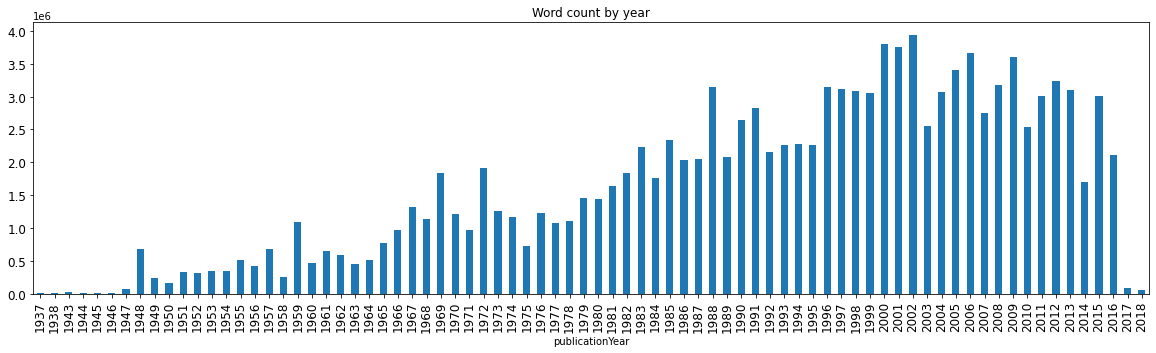

In [52]:
df.groupby(['publicationYear'])['wordCount'].agg('sum').plot.bar(title='Word count by year', figsize=(20, 5), fontsize=12);

This might take a while to run, especially if your dataset is large.  
Recall that if the kernel is working you'll see this **In [ * ]** to the left of the cell.

In [53]:
##Old code that now hangs df.groupby(['publicationYear', 'wordCount'])['id'].agg('count').unstack()\
    ##.plot.bar(title='Word count by year', legend=False, figsize=(20, 5), fontsize=12, stacked=True);

What do you think -- are documents with your search terms getting longer over time?

Want to learn more and/or try setting up your own Jupyter Notebook?   [This is a great tutorial.](https://www.dataquest.io/blog/jupyter-notebook-tutorial/)